In [4]:
import os.path as op
import random

import matplotlib.pyplot as plt
import pandas as pd
import yaml

from agents import GreedyAgent,RandomAgent
from agents.matchmanager import MatchManager
from agents.ml.classifier import ClassifierAgent
from agents.ml.regression import RegressionAgent
from core.const import RED, BLUE
from core.game.state import vectorStateInfo, vectorState, vectorActionInfo, vectorAction
from scenarios import scenarioJunction

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,4)

In [3]:
import sys
sys.path.append("../")

In [5]:
with open(op.join('.', '../logger.config.yaml'), 'r') as stream:
    config = yaml.load(stream, Loader=yaml.FullLoader)
# logging.config.dictConfig(config)

Functions definition:

In [6]:
def player(team:str, data:tuple, seed:int):
    if data[0] == 'gre':
        print(f'{team:5}-> GreedyAgent')
        return GreedyAgent(team, seed=seed)
    if data[0] == 'cls':
        print(f'{team:5}-> ClassifierAgent')
        return ClassifierAgent(team, data[1], seed=seed)
    if data[0] == 'reg':
        print(f'{team:5}-> RegressionAgent')
        return RegressionAgent(team, data[1], seed=seed)
    if data[0]=='ran':
        print(f'{team:5}-> RandomAgent')
        return RandomAgent(team, seed=seed)
        
    
    return None

In [7]:
def gameJunction(seed:int, red:tuple, blue:tuple) -> MatchManager:
    board, state = scenarioJunction()
    
    print('seed:   ', seed)
    
    playerRed = player(RED, red, seed)
    playerBlue = player(BLUE, blue, seed)

    mm = MatchManager(' ', playerRed, playerBlue, board, state, seed=seed)
    while not mm.end:
        mm.nextStep()
    
    print('winner: ', mm.winner)

    return mm

In [8]:
def prepareDataFrames(mm:MatchManager):
    df_states = pd.DataFrame(
        columns=vectorStateInfo(),
        data=[vectorState(x) for x in mm.states_history]
    )

    df_actions = pd.DataFrame(
        columns=vectorActionInfo(),
        data=[vectorAction(x) for x in mm.actions_history]
    )
    df_red = mm.red.createDataFrame()
    df_blue = mm.blue.createDataFrame()
    
    df_red = df_red.set_index('count')
    df_blue = df_blue.set_index('count')

    return df_red, df_blue, df_states, df_actions

Plot functions:

In [9]:
def plotEntropy(df, color:str):
    plt.figure()
    df.score.plot(color=color, marker='.')
    df.entropy.plot(color='purple')

    for i, row in df[['score','action']].reset_index().iterrows():
        dy, ha, va = (-0, 'center', 'top') if 'Respond' in row.action else (10, 'center', 'bottom')
        plt.annotate(row.action, (row['count'], row.score), ha=ha, va=va, rotation=90, textcoords="offset points", xytext=(0,dy))
        
    for x in df[['turn']].reset_index().groupby('turn').max().values.tolist():
        plt.axvline(x=x[0]+0.5, color='orange')

In [10]:
def plotContrast(df):
    df[df['team']=='red']['entropy'].plot(color='red'), df[df['team']=='blue']['entropy'].plot(color='blue')

Main analysis function:

In [11]:
def playAndAnalyze(seed:int, red_data, blue_data):  
    mm = gameJunction(seed, red_data, blue_data)
        
    df_red, df_blue, _, _ = prepareDataFrames(mm)
    
    plotEntropy(df_red, 'red')
    plotEntropy(df_blue, 'blue')
    
    return df_red, df_blue

In [16]:
red_models = [
    ('gre', ''),
    ('cls', '../models/Junction_RandomForestClassifier_red.joblib'),
    ('cls', '../models/Junction_RandomForestClassifier.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor_red.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor.joblib'),
]
blue_models = [
    ('gre', ''),
    ('cls', '../models/Junction_RandomForestClassifier_blue.joblib'),
    ('cls', '../models/Junction_RandomForestClassifier.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor_blue.joblib'),
    ('reg', '../models/Junction_RandomForestRegressor.joblib'),

]

In [17]:
seed = 51

# Regressions

In [ ]:
playAndAnalyze(seed, red_models[3], blue_models[3]);

# Classifiers

In [ ]:
playAndAnalyze(seed, red_models[1], blue_models[1]);

# Greedy

In [ ]:
playAndAnalyze(seed, red_models[0], blue_models[0]);

# Tourney!

In [18]:
random.seed(seed)

seed:    255346
red  -> RegressionAgent
blue -> RegressionAgent


No actions available: no response given


winner:  blue


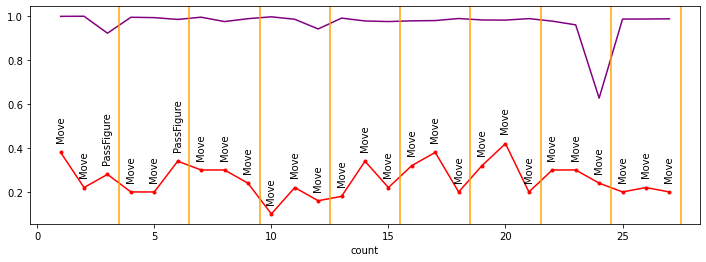

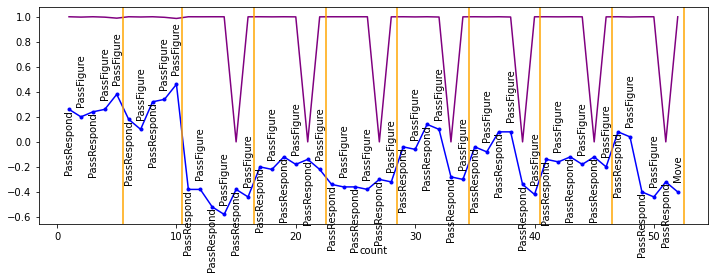

In [19]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

seed:    169803
red  -> ClassifierAgent
blue -> ClassifierAgent


No actions available: no response given
No actions available: no response given
No actions available: no response given
No actions available: no response given
No actions available: no response given
No actions available: no response given
No actions available: no response given
No actions available: no response given


winner:  blue


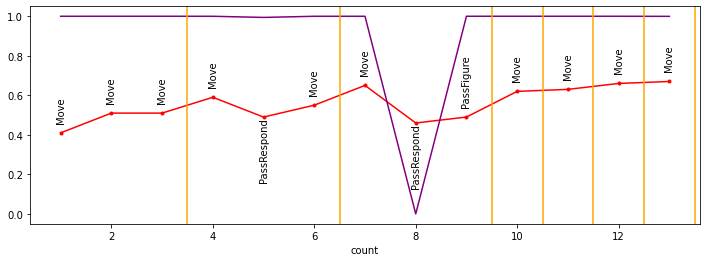

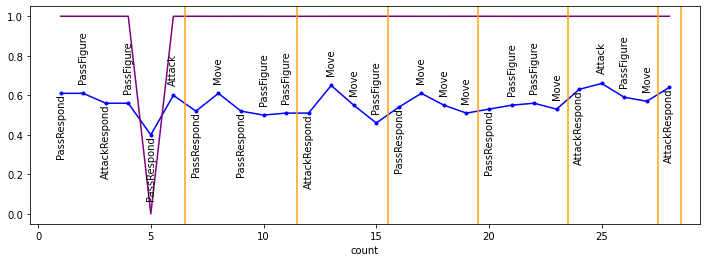

In [20]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

seed:    873043
red  -> RegressionAgent
blue -> ClassifierAgent


Entropy out of range: 1.0400012932228488
[0.24, 0.0, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0, 0.02, 0.04, 0.04, 0.0, 0.02, 0.04, 0.04, 0.0, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0, 0.02, 0.0, 0.02, 0.02, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.0, 0.02, 0.24, -0.04, -0.04, -0.04, -0.04, -0.02, -0.02, -0.04, -0.02, -0.02, -0.04, -0.04, -0.02, -0.04, -0.04, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.04, -0.02, -0.04, -0.04, -0.02, -0.02, -0.04, -0.02, -0.04, -0.04, -0.04, -0.02, -0.04, -0.04, -0.02]
Entropy out of range: 1.430670453954144
[0.1, 0.04, 0.04, 0.08, 0.0, -0.02, 0.08, 0.1, 0.0, 0.04, 0.08, 0.04, 0.04, -0.02, 0.0, 0.04, 0.12, 0.02, 0.12, 0.06, 0.04, 0.04, -0.04, -0.02, -0.02, -0.04, 0.02, 0.12, 0.08, 0.08, 0.0, 0.0, 0.0, -0.02, -0.02, 0.04, 0.0]
Entropy out of range: 1.4074989961934707
[-0.06, 0.14, -0.08, -0.08, -0.08, 0.14, -0.08, 0.14, 0.14, -0.08, 0.14, 0.14, 0.18, 0.2, -0.08, 0.18, 0.2, 0.2, 0.14, -0.08, 0.2, 0.18, 0.16, 0.18, 0.16, 0.14, 0.14, 0.14, -0.08, 0.

winner:  blue


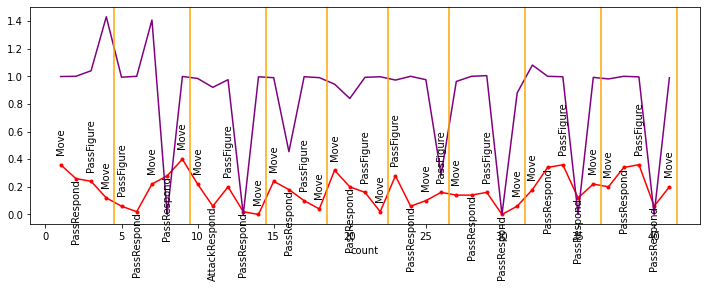

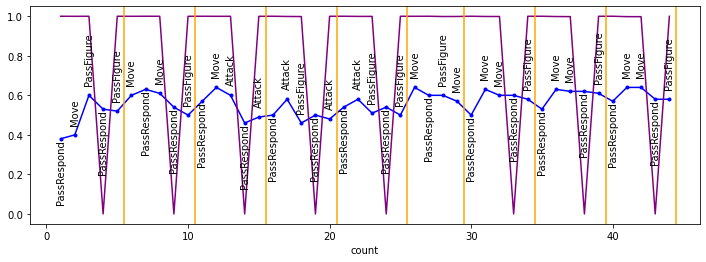

In [21]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

seed:    971356
red  -> RegressionAgent
blue -> RegressionAgent


No actions available: no response given
No actions available: no response given
Entropy out of range: 2.4654113264428887
[-0.02, 0.06, -0.04, -0.04, -0.06, 0.1, 0.1, 0.1, 0.06, 0.08, 0.1, 0.08, 0.12, 0.08, 0.12, 0.08, -0.06, 0.1, 0.12, 0.06, 0.08, 0.06, 0.06, 0.06, 0.08, 0.08, 0.1, 0.06, 0.08, 0.1, 0.04, 0.12, 0.06, 0.1, 0.12, 0.08, 0.08, 0.06, 0.1, -0.02, -0.04, 0.08, 0.08, 0.1, 0.1, 0.08, -0.04, 0.08, 0.08, 0.06, 0.1, -0.04, 0.08, 0.1, 0.06, 0.1, 0.06, 0.08, 0.1, 0.08, 0.08, 0.1, -0.06, 0.06, 0.1, 0.06, 0.08, -0.04, 0.08, 0.1, 0.06, 0.12, 0.06, 0.1, 0.06, 0.06, -0.02, 0.08, -0.06, 0.08, 0.06, 0.1, 0.06, 0.08, 0.1, 0.1, 0.1, -0.04, -0.02, 0.1, 0.06, 0.08, 0.08, 0.08, 0.1, 0.08, 0.06, 0.08, -0.04, 0.1, 0.06, 0.08, 0.08, 0.08, 0.1, 0.06, 0.08]
No actions available: no response given
Entropy out of range: 1.8602425936589848
[0.12, -0.12, 0.06, -0.06, 0.08, 0.2, 0.2, 0.08, 0.22, 0.06, 0.06, 0.16, 0.22, 0.08, 0.16, 0.22, 0.14, 0.2, 0.14, 0.2, 0.02, 0.14, 0.16, -0.04, 0.16, 0.18, 0.08, -0.0

winner:  blue


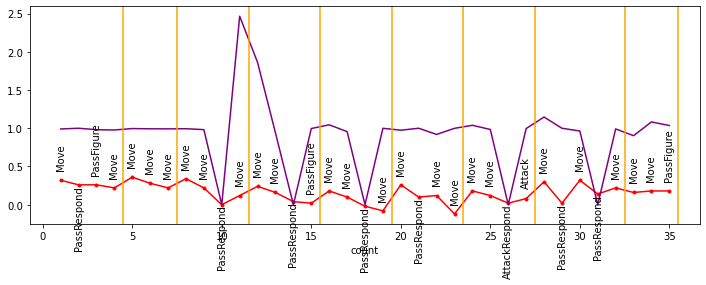

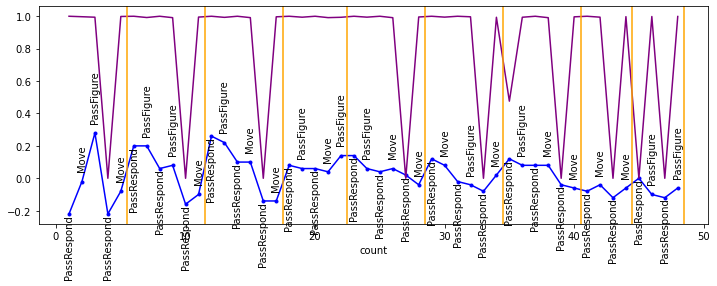

In [22]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);

In [ ]:
s = random.randint(0, 1000000)
r = random.randint(0, len(red_models)-1)
b = random.randint(0, len(blue_models)-1)

playAndAnalyze(s, red_models[r], blue_models[b]);